# Водораздел
http://cmm.ensmp.fr/~beucher/wtshed.html

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('../data/coins.jpg')

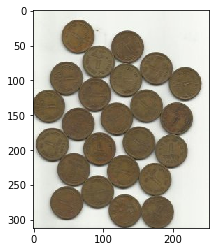

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Сегментируем по порогу

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, 
                            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

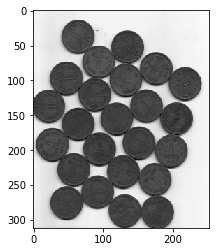

In [5]:
plt.imshow(gray, cmap='gray')

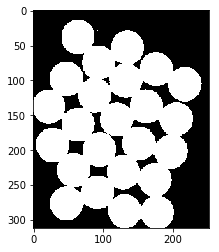

In [6]:
plt.imshow(thresh, cmap='gray')

## Применяем операцию dilate

In [7]:
# sure background area
kernel = np.ones((3,3), np.uint8)
sure_bg = cv2.dilate(thresh, kernel, iterations=3)

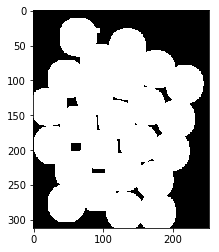

In [8]:
plt.imshow(sure_bg, cmap='gray')

## Для каждого пикселя вычисляем расстояние до ближашей грани

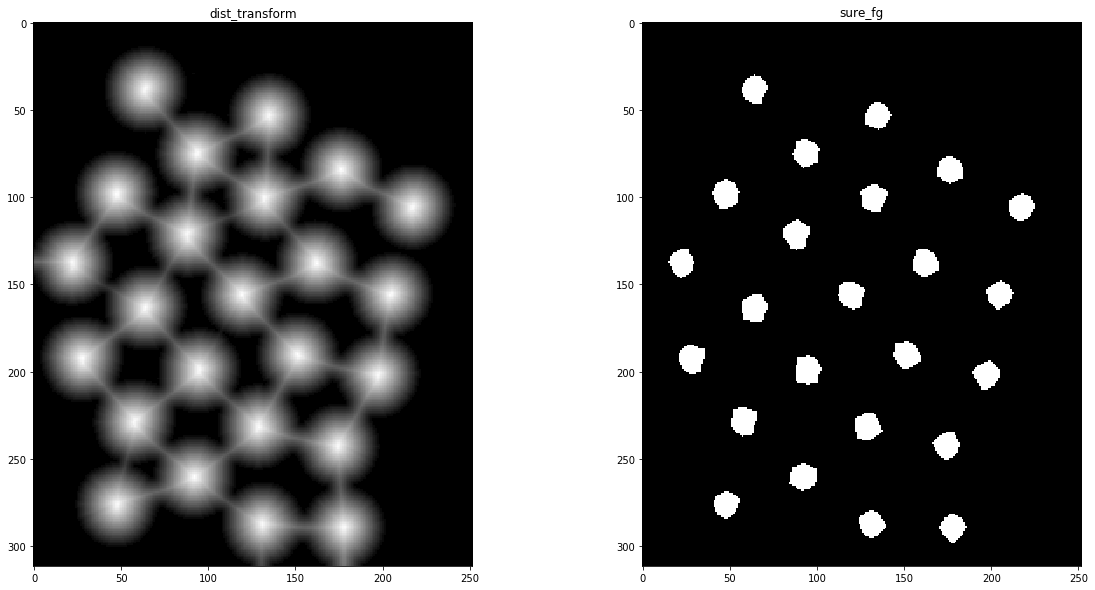

In [10]:
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,
                             0.7*dist_transform.max(),255,0)

fig = plt.figure(figsize=(20, 10))

subplot = fig.add_subplot(1, 2, 1)
plt.imshow(dist_transform, cmap='gray');
subplot.set_title('dist_transform');

subplot = fig.add_subplot(1, 2, 2)
plt.imshow(sure_fg, cmap='gray');
subplot.set_title('sure_fg');

## Получаем маску областей неопределенности

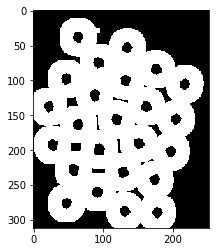

In [11]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap='gray')

## Задаем маркеры начального приближения

In [12]:
# объединяем соседние пиксели в связные компоненты
# в результате для каждого пикселя известен номер связной компоненты
# для пикселей фона (с нулевой интенсивностью) номер компоненты равен 0
ret, markers = cv2.connectedComponents(sure_fg)
# инкрементируем значения компонент на единицу, у фона теперь кластер 1
markers = markers + 1
# неизвестную область обозначаем свободной
markers[unknown==255] = 0

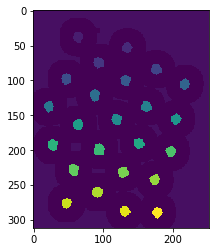

In [15]:
plt.imshow(markers)

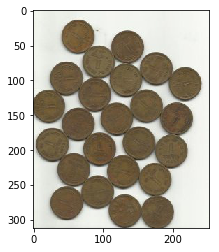

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Применяем алгоритм водораздела для сегментации

In [16]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

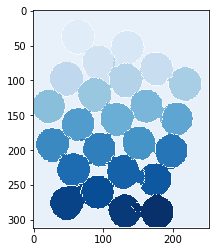

In [18]:
plt.imshow(markers, cmap=plt.cm.Blues)

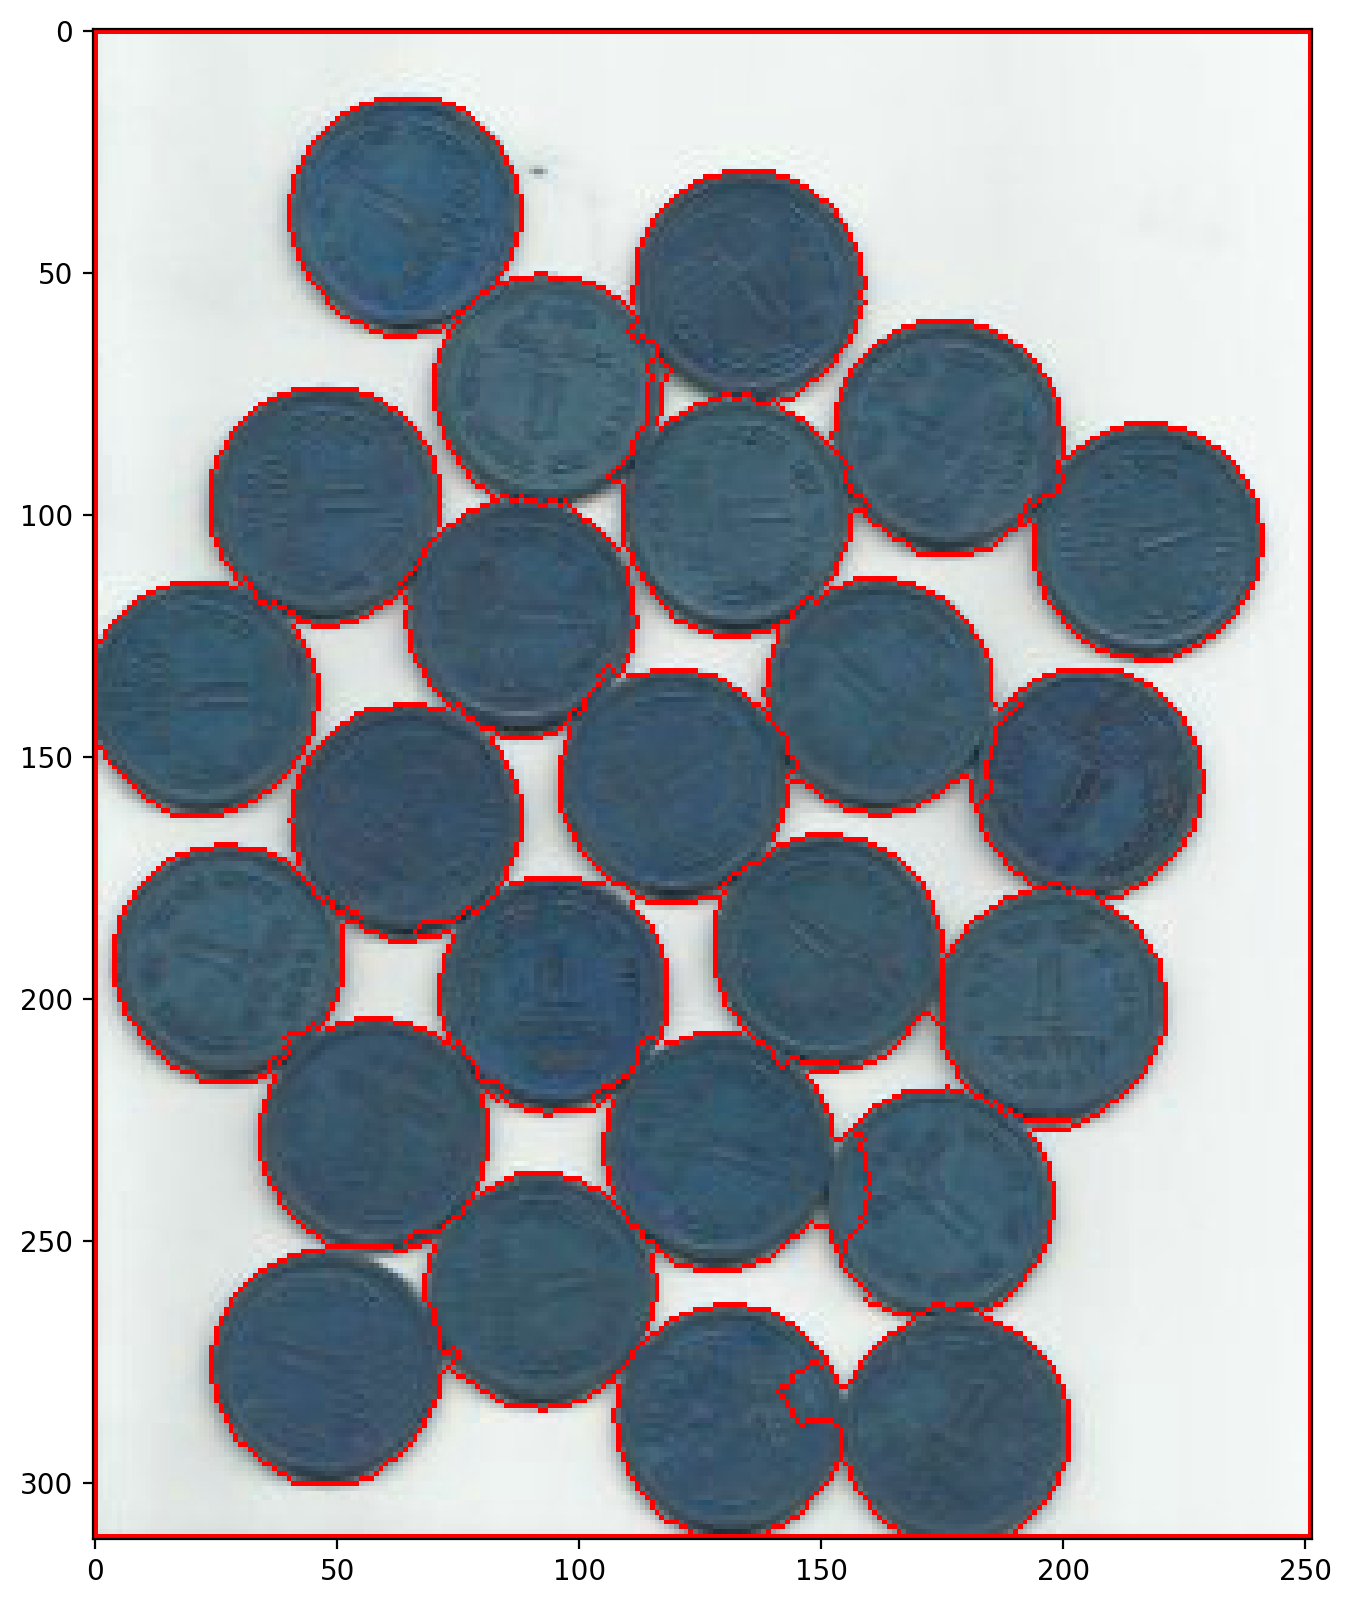

In [20]:
plt.figure(figsize=(20, 10), dpi=200)
plt.imshow(img)